In [12]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
TRAIN_RATIO = 0.6
VALIDATION_RATIO = 0.2
TEST_RATIO = 0.2

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=(1-TRAIN_RATIO))
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=((TEST_RATIO/(VALIDATION_RATIO+TEST_RATIO))))

X_train = np.reshape(X_train, (-1, 784)).astype('float32')
X_test = np.reshape(X_test, (-1, 784)).astype('float32')

In [3]:
dTree = DecisionTreeClassifier()
dTree.fit(X_train, y_train)

y_pred = dTree.predict(X_test)

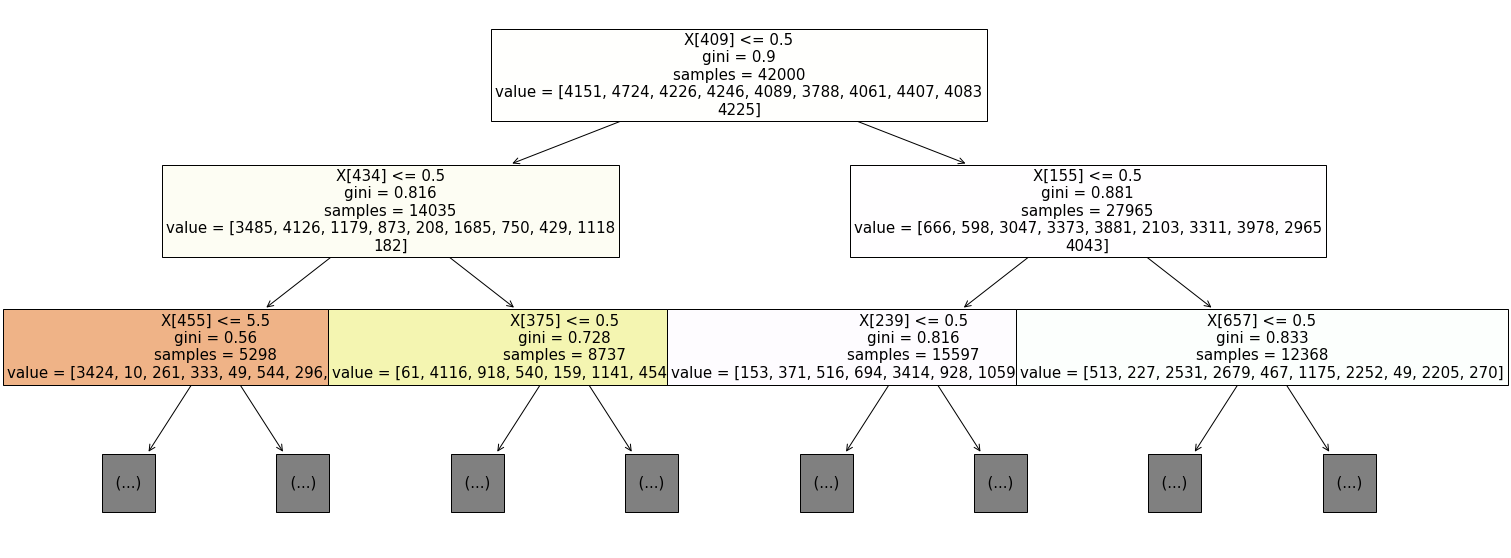

In [4]:
#plot the tree
fig, axe = plt.subplots(figsize=(25,10))
_ = plot_tree(dTree, max_depth=2, filled=True, ax=axe, fontsize=15)

In [15]:
confusionMat = pd.DataFrame(confusion_matrix(y_test, y_pred))
confusionMat , dTree.score(X_test, y_test)

print(confusionMat)
confusionMat_df = pd.DataFrame(confusionMat)
parameters = pd.DataFrame.from_dict(dTree.get_params(), orient = 'index')
print(parameters)

#performance measures
print(classification_report(y_test, y_pred, target_names=['0', '1', '2', '3','4','5','6','7','8','9']))

outname = 'confusionMat_DT.csv'
outname2 = 'parameters_DT.csv'

outdir = 'EXPORTS'
if not os.path.exists(outdir):
    os.mkdir(outdir)
    
confusionMat_df.to_csv(f"{outdir}/{outname}")
parameters.to_csv(f"{outdir}/{outname2}")

      0     1     2     3     4     5     6     7     8     9
0  1238     0    12    12     4    26    30     5    20     8
1     0  1498    17     6    10    11    17    10    10     5
2    21    18  1125    51    19    12    29    36    42    15
3    11    13    31  1180    10    70     6    28    56    23
4    11     9    23    16  1218    17    28    13    26    60
5    16    17     7    65    20  1029    49    14    36    26
6    14    13    15    13    18    38  1258    10    23     7
7     9    10    31    14    28     9     2  1305    11    40
8    15    26    37    56    28    32    26    15  1091    43
9     7     8    12    31    49    25     5    34    39  1118
                             0
ccp_alpha                  0.0
class_weight              None
criterion                 gini
max_depth                 None
max_features              None
max_leaf_nodes            None
min_impurity_decrease      0.0
min_samples_leaf             1
min_samples_split            2
min_weig